The purpose of this notebook is to plot and compare the test vector leakage assessment results of two separate files. There will be no checking to ensure the files being compared are of the same format (xmega/stm32 and unmasked/masked); it will be assumed that the user-entered parameters are correct. Much of this file will be similar to the "tvla_graph_generation" notebook.

The current implementation of this will be for only two datasets (down the line, the scope may change to include >2 datasets being compared).

Additional functions that are used in both this file and the NICV file are implemented in graphGenerationUtilities.py.

Below are descriptions of the input parameters:

- input_path_1: The directory containing the first csv file that will be used for plotting. Unlike other uses of an "input_parameter," this should include the file name itself. I.e, ensure the path to and including the file is passed.
- input_path_2: The directory containing the second csv file that will be used for plotting. Format is the same as what is mentioned for the above parameter.
- path_to_save_tvla_comparison: Path to save the plots to.

In [1]:
import os, sys
import pandas as pd
from math import floor, ceil

sys.path.append('../utilities/')
from graphGenerationUtilities import *

%load_ext autotime

In [2]:
data_params = {
    "input_path_1": '../results/unmasked-aes-stm32f/test-vector-leakage-assessment/PC2_CB2_TDS3_K6_U_20k/target-byte-10-byte-value-78.csv', # path to the first input file
    "input_path_2": '../results/unmasked-aes-stm32f/test-vector-leakage-assessment/PC2_CB2_TDS3_K0_U_200k/target-byte-7-byte-value-166.csv', # path to the second input file
    "path_to_save_tvla_comparison":"../results/unmasked-aes-stm32f/test-vector-leakage-assessment/comparisons/" # path to save csv file containing time and t value
}

# The directory to save the files is created.
model_dir_path = data_params["path_to_save_tvla_comparison"]
if not os.path.isdir(model_dir_path):
    os.makedirs(model_dir_path)

In [3]:
def calc_y_ticks_of_dfs(df_obj1, df_obj2):
    '''
    This function accepts two Pandas DataFrame objects as input.
    The appropriate y-ticks are calculated based on the values of these two parameters.
    '''
    # The min and max values between both df objects are gotten
    min_t_val = floor(min([df_obj1["t-value"].min(), df_obj2["t-value"].min()]))
    max_t_val = ceil(max([df_obj1["t-value"].max(), df_obj2["t-value"].max()]))
    
    # The range of the above values is calculated.
    # This is floored with an arbitrarily-selected value. This value affects the number of y-ticks shown.
    # This will represent the amount incremented between y-ticks.
    t_val_increment = ((max_t_val - min_t_val)//5)

    # The increment value is ensured to be at least 1.
    if not(t_val_increment):
        t_val_increment = 1

    # The y_ticks are created. 
    y_ticks = list(range(min_t_val, max_t_val+1, t_val_increment))

    # If the max t value was not included in the range (the data extends above the largest y-tick)
    # Then a new value is added to the y-ticks; the current max y-tick plus the increment value.
    if not(max_t_val in y_ticks):
        y_ticks.append(y_ticks[-1]+t_val_increment)
    
    return y_ticks

In [4]:
# Both input files are read and converted to DataFrame objects.
tvla_1_df = read_csv_file_as_df(data_params["input_path_1"])
tvla_2_df = read_csv_file_as_df(data_params["input_path_2"])
# The y_ticks are calculated based on the above DataFrames.
y_ticks = calc_y_ticks_of_dfs(tvla_1_df, tvla_2_df)

# The x_ticks are calculated. It is assumed that both dfs have the same num_time_samples
num_time_samples = tvla_1_df.shape[0]
time_samples_inc = num_time_samples//5
x_ticks = list(range(0, num_time_samples+1, time_samples_inc))

# The file and parent directory names are gotten from the path parameters.
tvla_file_name_1 = get_file_name_from_path(data_params["input_path_1"])
tvla_file_1_parent_dir = os.path.dirname(data_params["input_path_1"]).rsplit("/")[-1]
tvla_file_name_2 = get_file_name_from_path(data_params["input_path_2"])
tvla_file_2_parent_dir = os.path.dirname(data_params["input_path_2"]).rsplit("/")[-1]

# The plot labels are created based on the above variables.
tvla_label_1 = "{}_{}".format(tvla_file_1_parent_dir, replace_file_name_text(tvla_file_name_1, "TVLA"))
tvla_label_2 = "{}_{}".format(tvla_file_2_parent_dir, replace_file_name_text(tvla_file_name_2, "TVLA"))

# The file name is based on the labels.
f_name = "{}_{}".format(tvla_label_1, tvla_label_2)

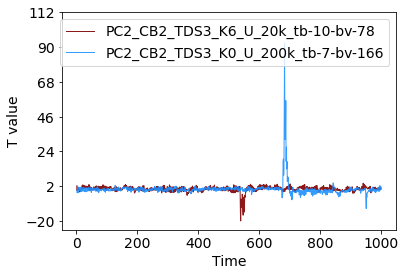

In [5]:
fig, ax = plt.subplots()
ax.plot(tvla_1_df['time'], tvla_1_df['t-value'], color='maroon', 
        linestyle='-', linewidth=1, alpha=0.9, label=tvla_label_1)

ax.plot(tvla_2_df['time'], tvla_2_df['t-value'], color='dodgerblue', 
        linestyle='-', linewidth=1, alpha=0.9, label=tvla_label_2)

legend_without_duplicate_labels(ax, loc="upper right")
plt.xlabel('Time')
plt.ylabel('T value')
plt.xticks(x_ticks)
plt.yticks(y_ticks)

tvla_plot_path = os.path.join(data_params['path_to_save_tvla_comparison'], f_name + "-plot.png")
plt.savefig(tvla_plot_path, dpi=150, bbox_inches='tight')
plt.show()